# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

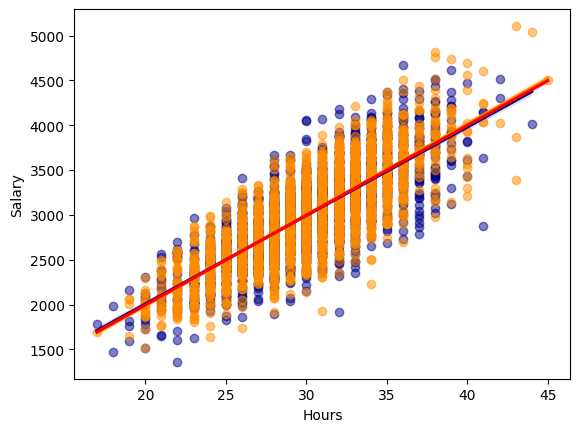

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 100.1


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

### Scenario a: Direct discrimination

In [5]:
n = 5000
gen = np.random.binomial(1, 0.5, size=n)
hrs = np.random.binomial(60, 0.5, size=n)
sal = hrs * np.random.normal(100, 10, size=n)
sal = sal - gen * 200
data_a = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

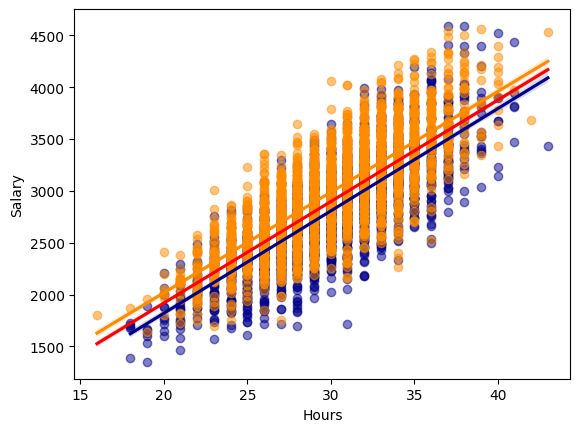

In [6]:
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_a, marker="None", color="red")
plt.show()

In [7]:
reg_a = LinearRegression().fit(data_a['Hours'].values.reshape(-1,1), data_a['Salary'].values.reshape(-1,1))
print("Scenario a slope: %.1f" % reg_a.coef_[0][0])

Scenario a slope: 97.9


### Scenario b: No discrimination

In [8]:
n = 5000
gen = np.random.binomial(1, 0.5, size=n)
hrs = np.where(gen == 0, np.random.binomial(60, 0.55, size=n), np.random.binomial(60, 0.45, size=n))
sal = hrs * np.random.normal(100, 10, size=n)
data_b = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

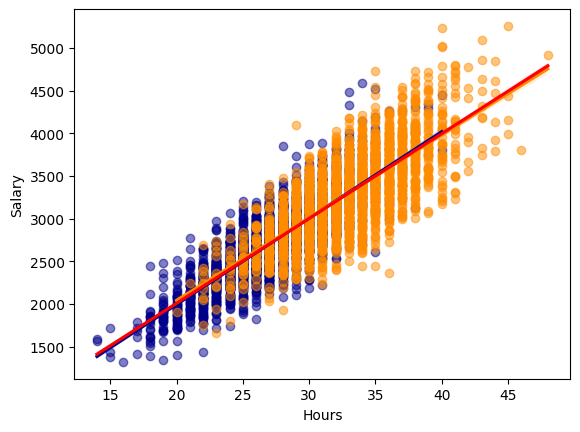

In [9]:
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_b, marker="None", color="red")
plt.show()

In [10]:
reg_b = LinearRegression().fit(data_b['Hours'].values.reshape(-1,1), data_b['Salary'].values.reshape(-1,1))
print("Scenario b slope: %.1f" % reg_b.coef_[0][0])

Scenario b slope: 99.4


### Scenario c: Indirect discrimination

In [11]:
n = 5000
gen = np.random.binomial(1, 0.5, size=n)
hrs = np.where(gen == 0, np.random.binomial(60, 0.55, size=n), np.random.binomial(60, 0.45, size=n))
sal = hrs * np.random.normal(100, 10, size=n)
sal = sal - gen * 200
data_c = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

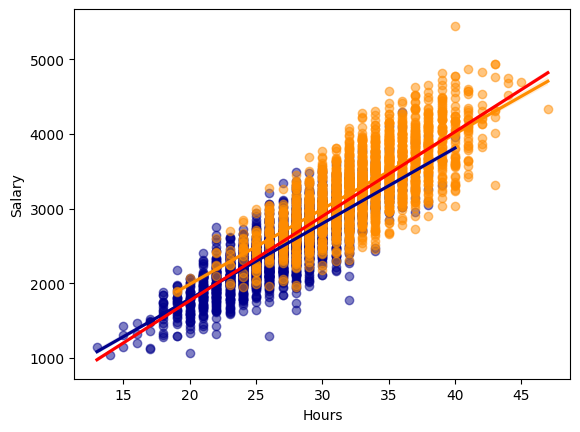

In [12]:
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data_c, marker="None", color="red")
plt.show()

In [13]:
reg_c = LinearRegression().fit(data_c['Hours'].values.reshape(-1,1), data_c['Salary'].values.reshape(-1,1))
print("Scenario c slope: %.1f" % reg_c.coef_[0][0])

Scenario c slope: 113.1


### Detecting indirect discrimination

In [14]:
X = data_c[['Hours', 'Gender']].values
y = data_c['Salary'].values
reg_multi = LinearRegression().fit(X, y)
print("Hours coefficient: %.1f" % reg_multi.coef_[0])
print("Gender coefficient: %.1f" % reg_multi.coef_[1])
print("Intercept: %.1f" % reg_multi.intercept_)

Hours coefficient: 100.9
Gender coefficient: -193.1
Intercept: -33.7


### Answers

**Question 1: In which of the scenarios does the slope (coefficient) of the regression model change?**

The slope changes significantly **only in Scenario c (indirect discrimination)**.

- **Scenario a (direct discrimination)**: Slope remains close to 100. The 200 euro reduction is a constant offset that shifts all women's salaries down uniformly, but does not affect the hours-salary relationship.

- **Scenario b (no discrimination)**: Slope remains close to 100. Although men and women have different working hours distributions, the per-hour wage rate remains 100 euros for both groups, so the overall slope stays at 100.

- **Scenario c (indirect discrimination)**: Slope becomes significantly higher than 100. This happens because working hours and gender are correlated (men work more hours on average), and gender also affects salary (women earn 200 euros less). When we fit a simple linear regression using only hours, the model conflates these two effects, leading to a biased slope estimate that is higher than the true per-hour rate.

**Question 2: How could you model the data to detect indirect discrimination?**

To detect indirect discrimination, **include the protected characteristic (gender) in the model** using multiple linear regression:

`Salary = β₀ + β₁ × Hours + β₂ × Gender`

The coefficients reveal the true relationships:
- **β₁ (Hours coefficient)**: Should be close to 100, representing the true per-hour wage rate after controlling for gender
- **β₂ (Gender coefficient)**: Should be close to -200, representing the direct discrimination effect - women earn approximately 200 euros less than men for the same working hours
- If β₂ is significantly different from 0 after controlling for hours, it indicates discrimination exists

In Scenario c, the multiple regression correctly separates the two effects: it recovers the true hourly rate (β₁ ≈ 100) and identifies the direct pay gap (β₂ ≈ -200). This approach allows us to distinguish direct discrimination from wage gaps caused by differences in working hours.